In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
df=pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,1015.95,Partly cloudy starting in the morning.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [4]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [5]:
df.shape

(96453, 11)

In [6]:
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [7]:
df=df[~df['Precip Type'].isnull()]

In [8]:
df.shape

(95936, 11)

In [9]:
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [10]:
object_type = df.select_dtypes(include = ["object"]).keys()
object_type

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')

In [11]:
numerical_data=df.select_dtypes(include = ["int64","float64"]).keys()
numerical_data

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [12]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.dtypes

C:\Users\ankur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [13]:
df['Year'] = df['Formatted Date'].dt.year 
df['Month'] = df['Formatted Date'].dt.month 
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour 
df['Minute'] = df['Formatted Date'].dt.minute

C:\Users\ankur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ankur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ankur\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [14]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Minute
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31,22,0
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31,23,0
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1,0,0
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1,1,0
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1,2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  int64              
 8   Visibility (km)           95936 non-null  float64            
 9   Pressure (millibars)      95936 non-null  float64            
 10  Daily Summary             95936 non-null  object             
 11  Year           

In [16]:
df.groupby(['Year','Month','Day','Hour','Minute']).sum()

Temperature (C)  Apparent Temperature (C)  \
Year Month Day Hour Minute                                              
2005 12    31  23   0              0.577778                 -4.050000   
2006 1     1   0    0              1.161111                 -3.238889   
               1    0              1.666667                 -3.155556   
               2    0              1.711111                 -2.194444   
               3    0              1.183333                 -2.744444   
...                                     ...                       ...   
2016 12    31  18   0              0.488889                 -2.644444   
               19   0              0.072222                 -3.050000   
               20   0             -0.233333                 -3.377778   
               21   0             -0.472222                 -3.644444   
               22   0             -0.677778                 -3.888889   

                            Humidity  Wind Speed (km/h)  \
Year Month Day Hour Minute                                
2005 12    31  23   0           0.89            17.1143   
2006 1     1   0    0           0.85            16.6152   
               1    0           0.82            20.2538   
               2    0           0.82            14.4900   
               3    0           0.86            13.9426   
...                              ...                ...   
2016 12    31  18   0           0.86             9.7566   
               19   0           0.88             9.4185   
               20   0           0.89             9.2736   
               21   0           0.91             9.2414   
               22   0           0.92             9.2253   

                            Wind Bearing (degrees)  Visibility (km)  \
Year Month Day Hour Minute                                            
2005 12    31  23   0                          140           9.9820   
2006 1     1   0    0                          139           9.9015   
               1    0                          140           9.9015   
               2    0                          140           9.9015   
               3    0                          134           9.9015   
...                                            ...              ...   
2016 12    31  18   0                          167           8.0178   
               19   0                          169           7.2450   
               20   0                          175           9.5795   
               21   0                          182           8.4042   
               22   0                          189           8.8711   

                            Pressure (millibars)  
Year Month Day Hour Minute                        
2005 12    31  23   0                    1016.66  
2006 1     1   0    0                    1016.15  
               1    0                    1015.87  
               2    0                    1015.56  
               3    0                    1014.98  
...                                          ...  
2016 12    31  18   0                    1020.03  
               19   0                    1020.27  
               20   0                    1020.50  
               21   0                    1020.65  
               22   0                    1020.72  

[95912 rows x 7 columns]

In [17]:
df[numerical_data].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027665E3CB48>,
      dtype=object)

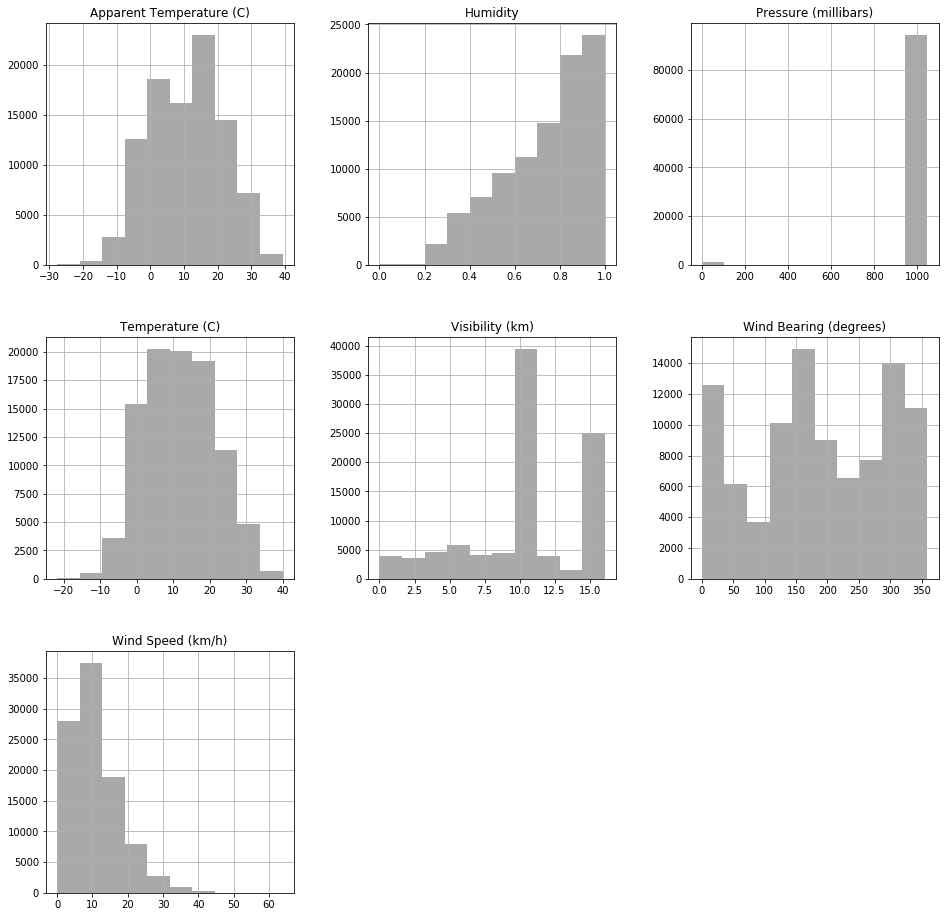

In [18]:
rcParams['figure.figsize'] = 16,16
df[numerical_data].hist(color='darkgray')

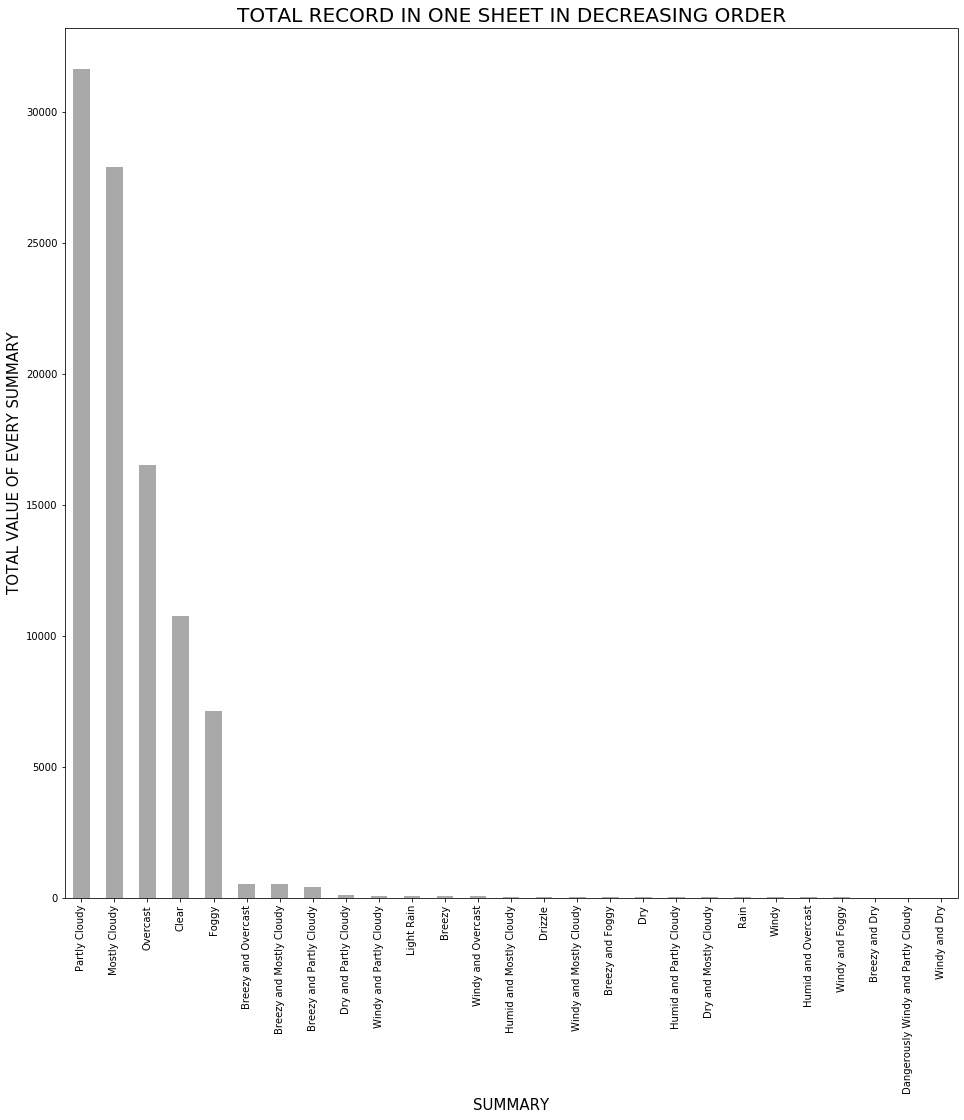

In [19]:
rcParams['figure.figsize'] = 16,16
df['Summary'].value_counts().plot.bar(color='darkgray')
plt.title("TOTAL RECORD IN ONE SHEET IN DECREASING ORDER",fontsize=20)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('TOTAL VALUE OF EVERY SUMMARY',fontsize=15)
plt.show()

In [20]:
df_1=df.groupby(['Summary']).mean().reset_index()

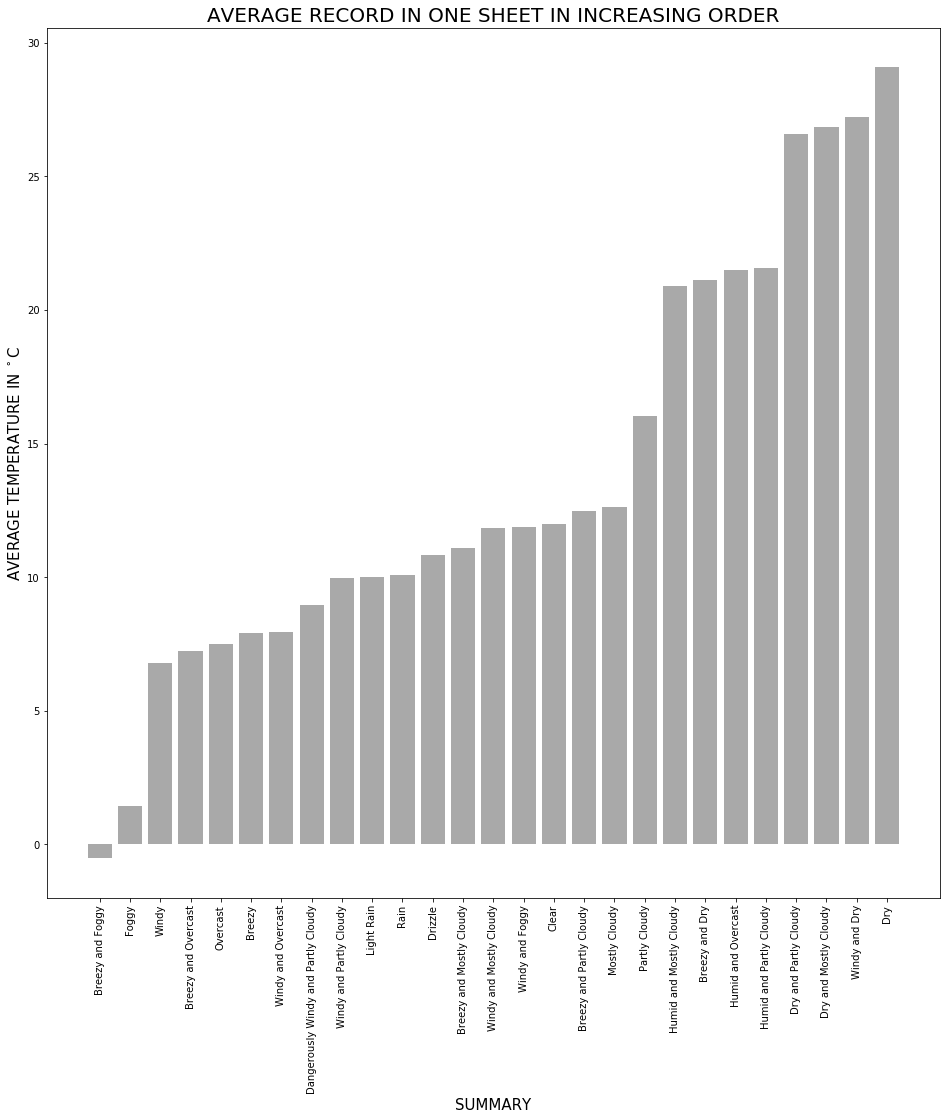

In [21]:
df_sort1= df_1.sort_values('Temperature (C)')
rcParams['figure.figsize'] = 16,16
y=df_sort1['Temperature (C)']
x=df_sort1['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE TEMPERATURE IN $^\circ$C',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

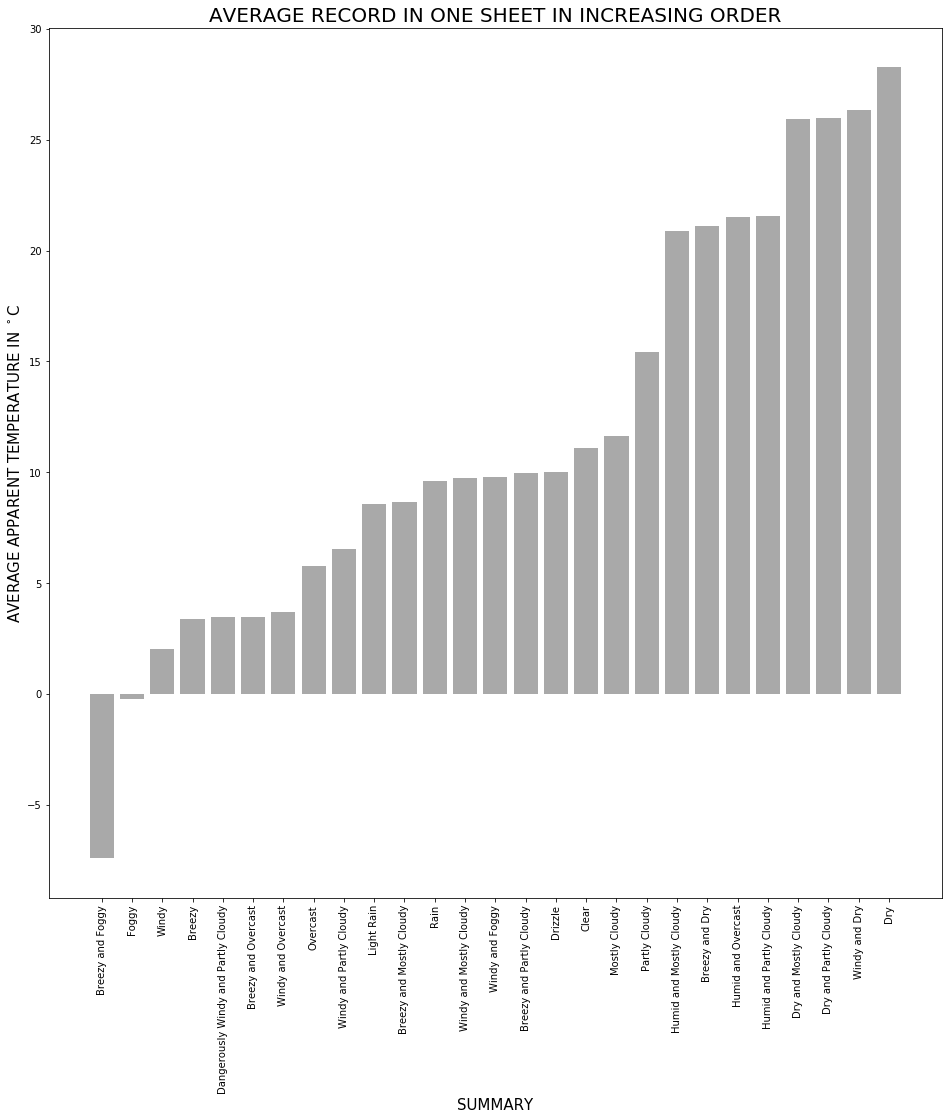

In [22]:
df_sort2= df_1.sort_values('Apparent Temperature (C)')
rcParams['figure.figsize'] = 16,16
y=df_sort2['Apparent Temperature (C)']
x=df_sort2['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE APPARENT TEMPERATURE IN $^\circ$C',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

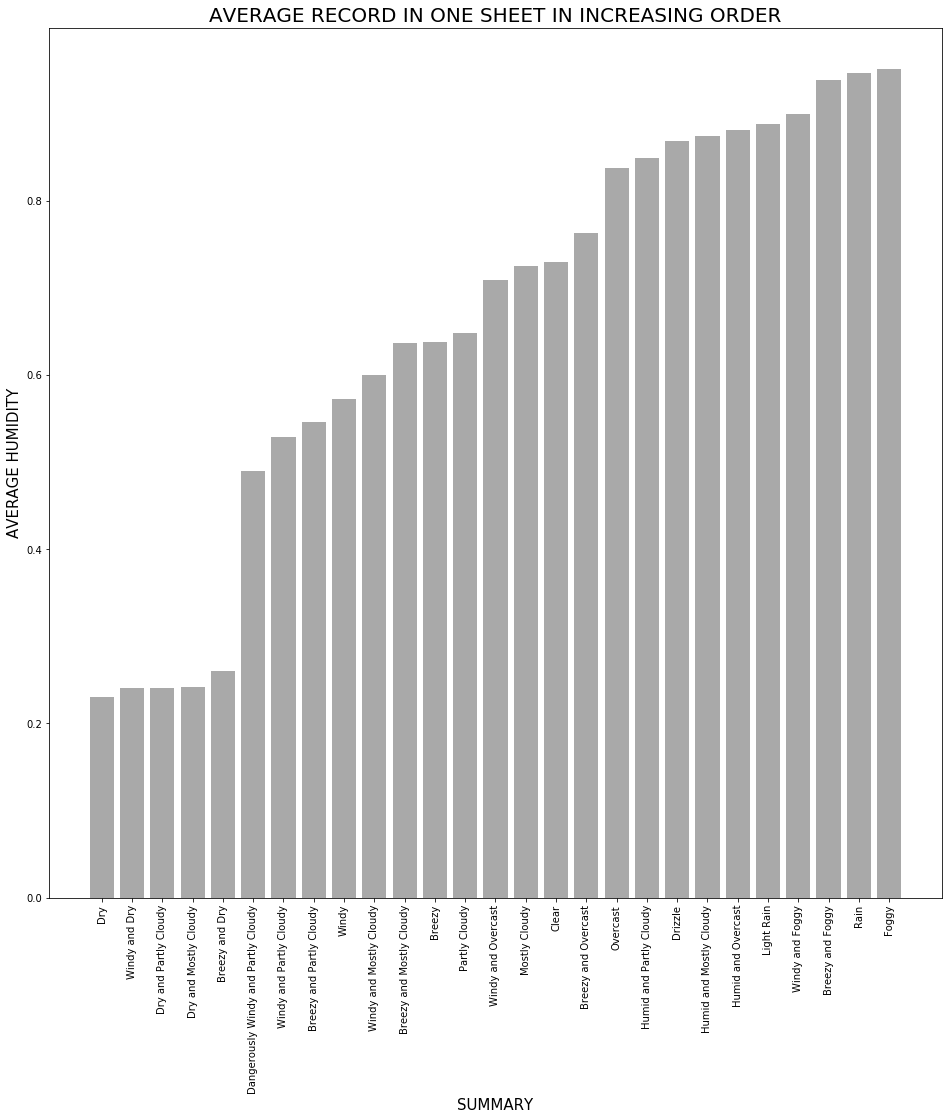

In [23]:
df_sort3= df_1.sort_values('Humidity')
rcParams['figure.figsize'] = 16,16
y=df_sort3['Humidity']
x=df_sort3['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE HUMIDITY',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

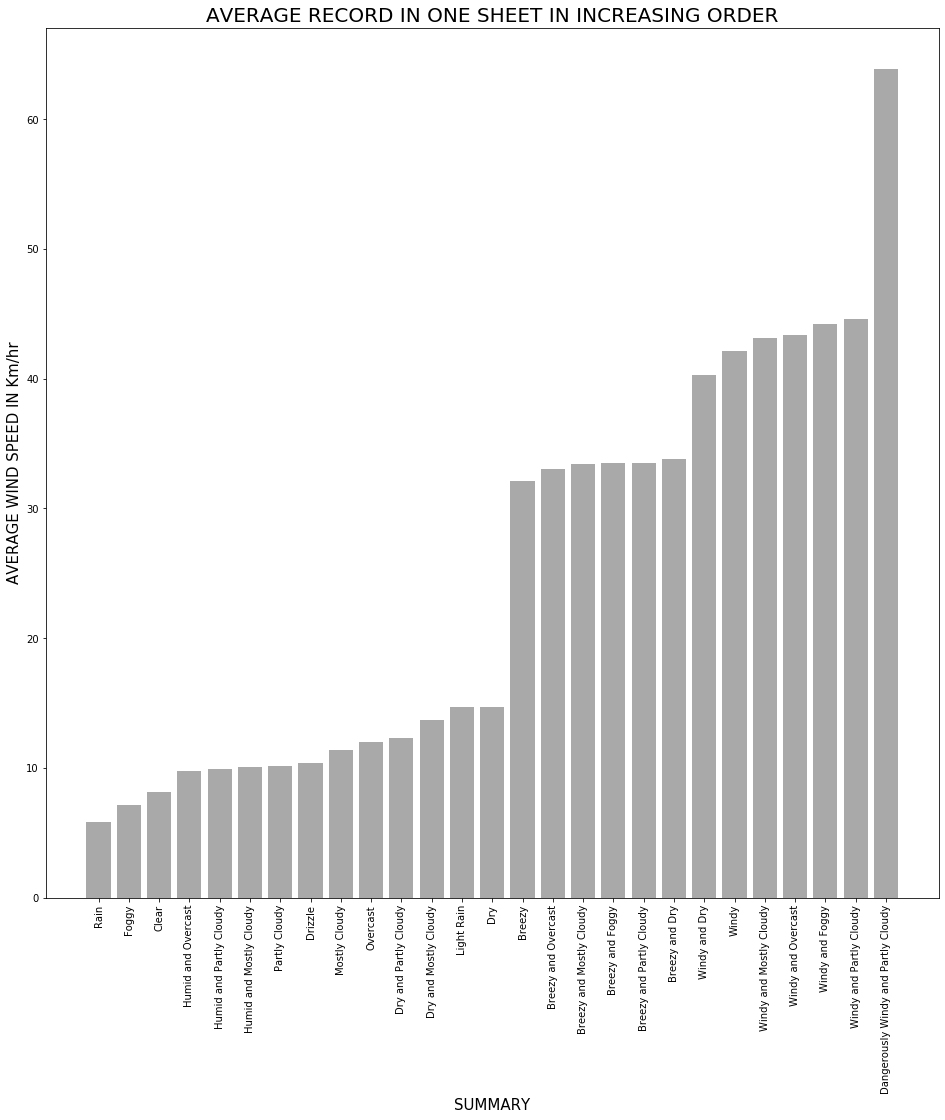

In [24]:
df_sort4= df_1.sort_values('Wind Speed (km/h)')
rcParams['figure.figsize'] = 16,16
y=df_sort4['Wind Speed (km/h)']
x=df_sort4['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE WIND SPEED IN Km/hr',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

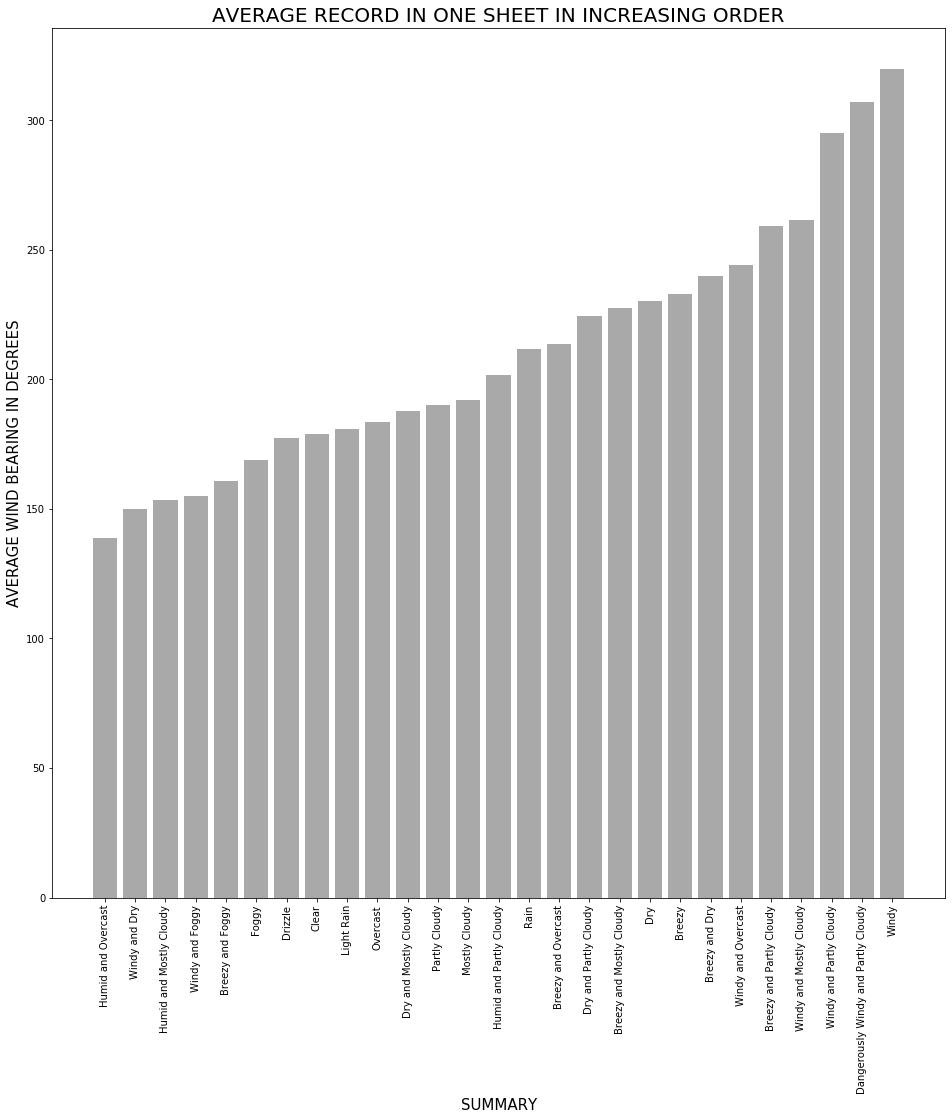

In [25]:
df_sort5= df_1.sort_values('Wind Bearing (degrees)')
rcParams['figure.figsize'] = 16,16
y=df_sort5['Wind Bearing (degrees)']
x=df_sort5['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE WIND BEARING IN DEGREES',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

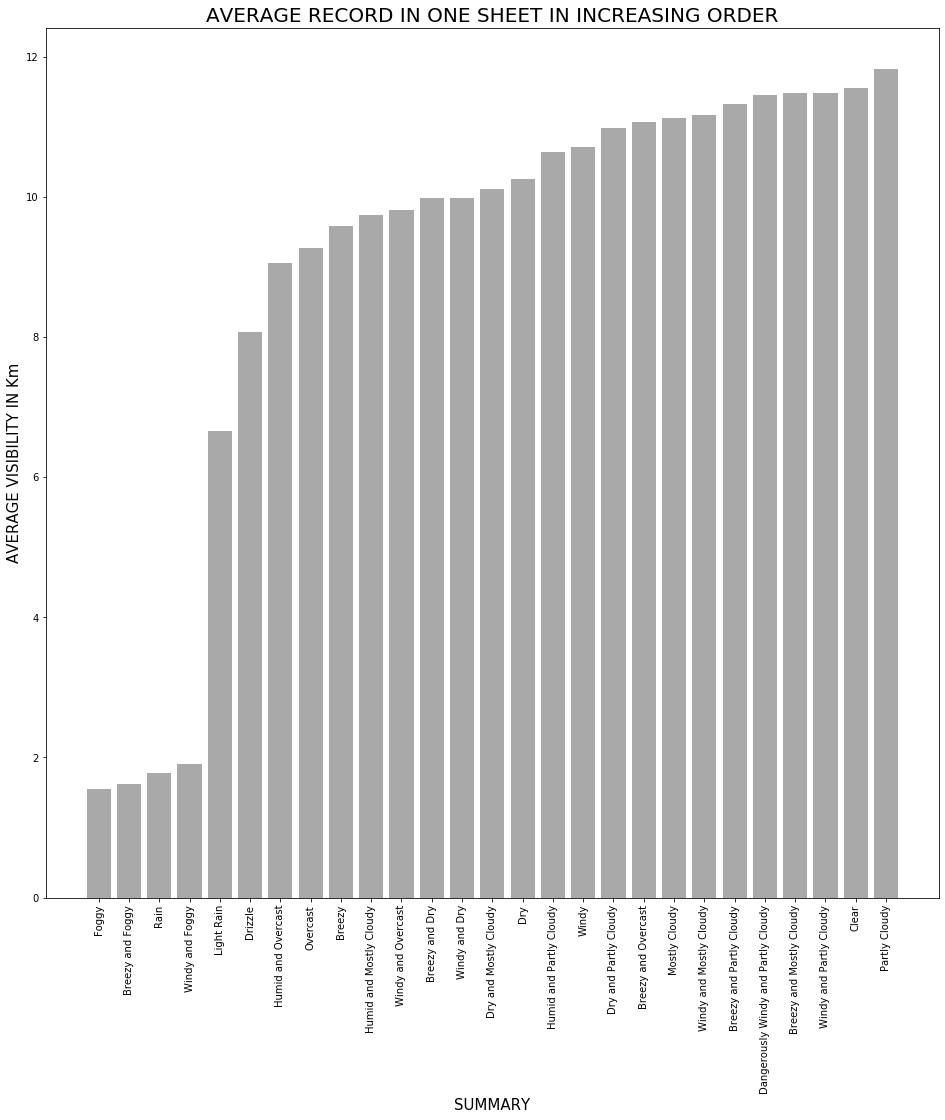

In [26]:
df_sort6= df_1.sort_values('Visibility (km)')
rcParams['figure.figsize'] = 16,16
y=df_sort6['Visibility (km)']
x=df_sort6['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE VISIBILITY IN Km',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

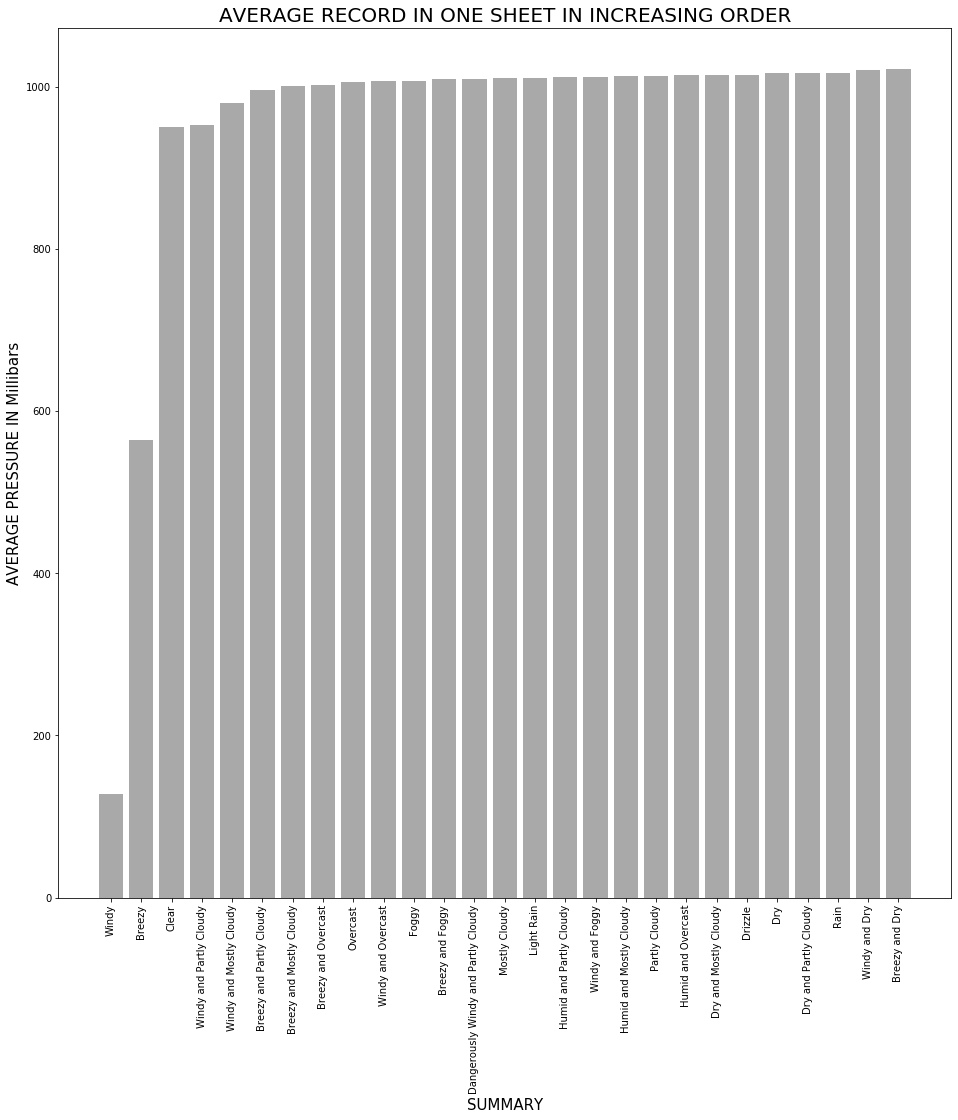

In [27]:
df_sort7= df_1.sort_values('Pressure (millibars)')
rcParams['figure.figsize'] = 16,16
y=df_sort7['Pressure (millibars)']
x=df_sort7['Summary']
plt.title("AVERAGE RECORD IN ONE SHEET IN INCREASING ORDER",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SUMMARY',fontsize=15)
plt.ylabel('AVERAGE PRESSURE IN Millibars',fontsize=15)
plt.bar(x,y,color='darkgray')
plt.show()

In [28]:
summary_freq=pd.crosstab(index=df['Summary'],columns="count")
summary_freq

col_0,count
Summary,
Breezy,54
Breezy and Dry,1
Breezy and Foggy,35
Breezy and Mostly Cloudy,516
Breezy and Overcast,528
Breezy and Partly Cloudy,386
Clear,10763
Dangerously Windy and Partly Cloudy,1
Drizzle,39


In [29]:
summary_freq_rel = summary_freq*100/summary_freq.sum() 
summary_freq_rel.sort_values('count', ascending=False)

col_0,count
Summary,
Partly Cloudy,32.975108
Mostly Cloudy,29.096481
Overcast,17.215644
Clear,11.218938
Foggy,7.418487
Breezy and Overcast,0.550367
Breezy and Mostly Cloudy,0.537859
Breezy and Partly Cloudy,0.402352
Dry and Partly Cloudy,0.089643


In [30]:
def cloud_categorizer(row):
   row = str(row).lower()
   category = ""
   if "foggy" in row:
       category = 5
   elif "overcast" in row:
       category = 4
   elif "mostly cloudy" in row:
       category = 3
   elif "partly cloudy" in row:
       category = 2
   elif "clear" in row:
       category = 1
   else:
       category = 0
   return category 

df["cloud (summary)"] = df.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)

C:\Users\ankur\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


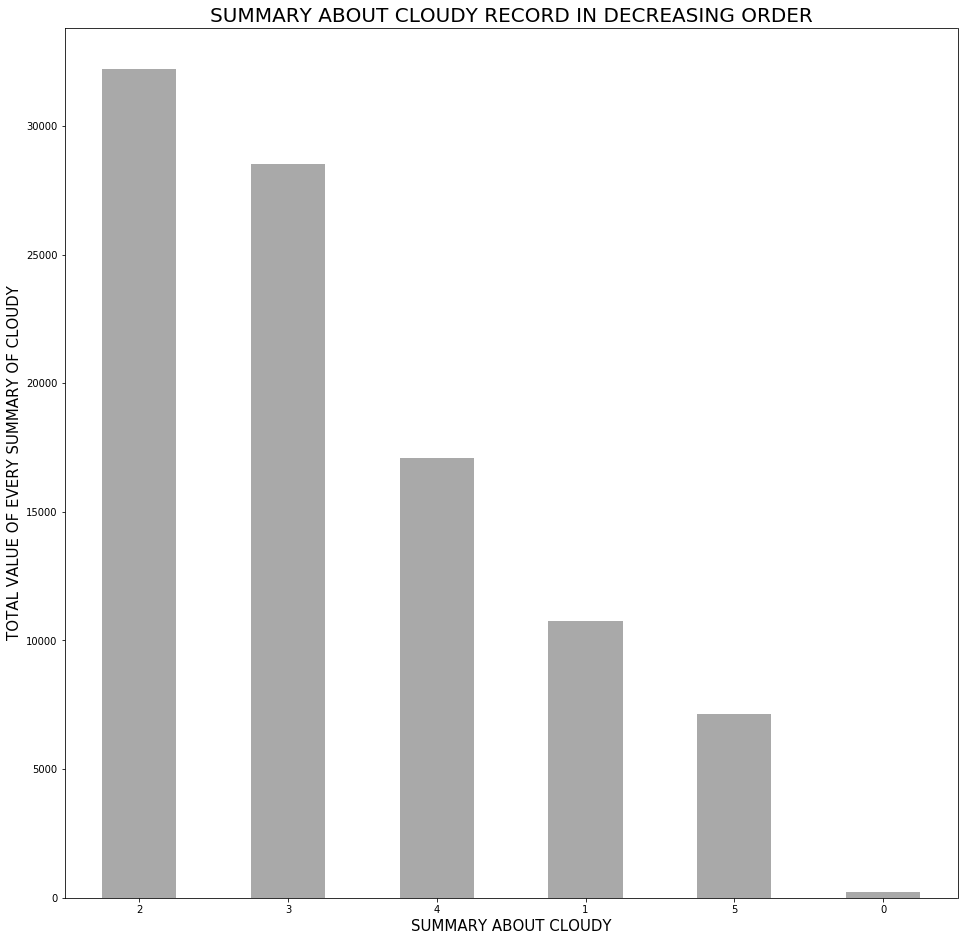

In [31]:
df['cloud (summary)'].value_counts().plot.bar(color='darkgray')
rcParams['figure.figsize'] = 16,16
plt.title("SUMMARY ABOUT CLOUDY RECORD IN DECREASING ORDER",fontsize=20)
plt.xlabel('SUMMARY ABOUT CLOUDY',fontsize=15)
plt.ylabel('TOTAL VALUE OF EVERY SUMMARY OF CLOUDY',fontsize=15)
plt.xticks(rotation=0)
plt.show()

* There '0=other','1=c1ear', '2=Partly Cloudy', '3=Mostly Cloudy', '4=Overcast', '5=Foggy'

In [32]:
a=df.groupby(['Year']).Humidity.mean().reset_index()

In [33]:
df.rename(columns = {'Apparent Temperature (C)':'AT'}, inplace = True)
b=df.groupby(['Year']).AT.mean().reset_index()

C:\Users\ankur\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
merge = pd.merge(a, b, how='right',on='Year')
merge.rename(columns = {'AT':'Average Apparent Temperature'}, inplace = True)
merge

,Year,Humidity,Average Apparent Temperature
0,2005,0.890000,-4.050000
1,2006,0.767349,10.158189
2,2007,0.689647,11.062986
3,2008,0.701239,11.053128
4,2009,0.707247,11.070866
5,2010,0.796861,10.097002
6,2011,0.736008,10.584490
7,2012,0.689784,10.700025
8,2013,0.754197,10.825509
9,2014,0.748571,11.627649


Text(0, 0.5, 'HUMIDITY')

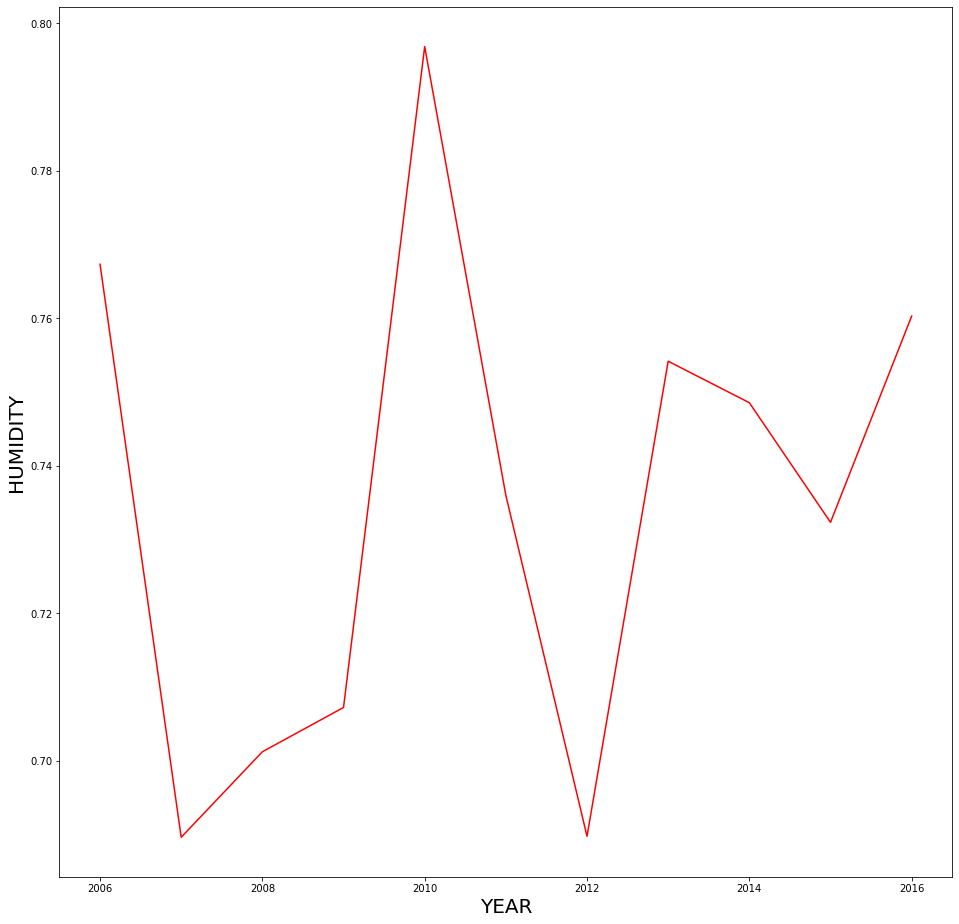

In [35]:
fig, ax1 = plt.subplots()
x = merge['Year'][1:]
y = merge['Humidity'][1:]
ax1.plot(x, y, 'r-')
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('HUMIDITY',fontsize=20)

Text(0, 0.5, 'Average Apparent Temperature')

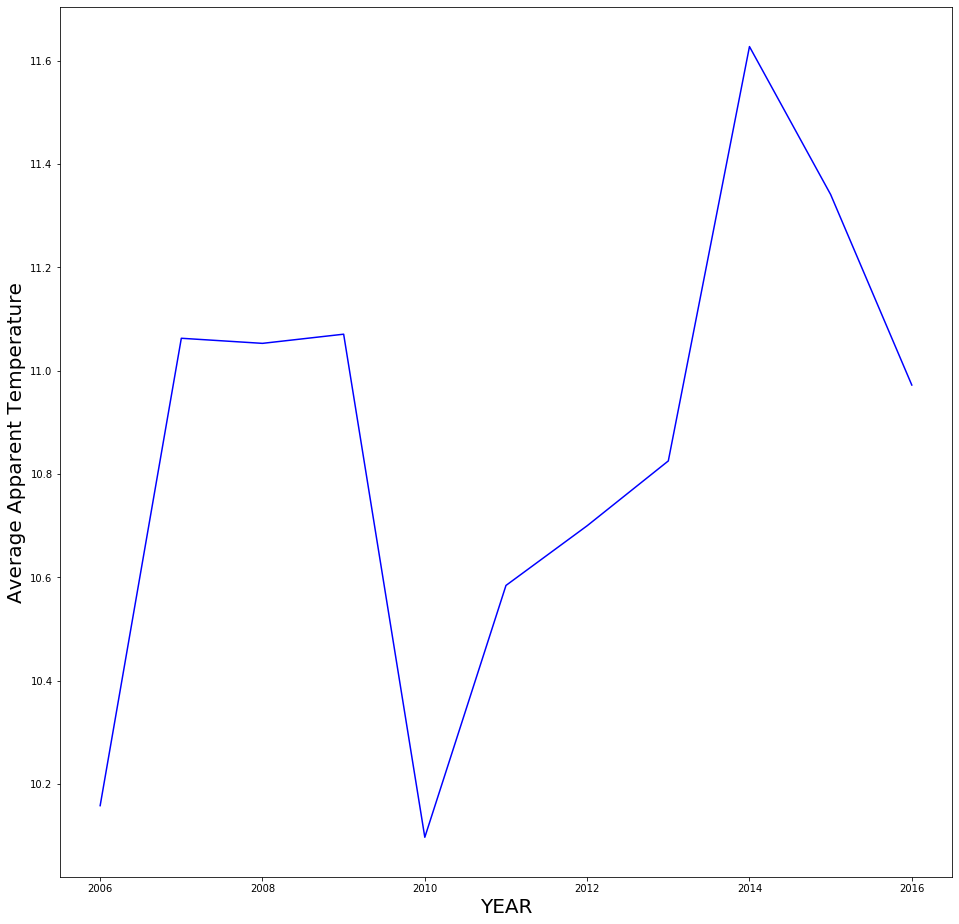

In [36]:
fig, ax1 = plt.subplots()
x = merge['Year'][1:]
y = merge['Average Apparent Temperature'][1:]
ax1.plot(x, y, 'b-')
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('Average Apparent Temperature',fontsize=20)

In [37]:
c=df.groupby(['Month']).Humidity.mean().reset_index()
df.rename(columns = {'Apparent Temperature (C)':'AT'}, inplace = True)
d=df.groupby(['Month']).AT.mean().reset_index()
merge_1 = pd.merge(c, d, how='right',on='Month')
merge_1.rename(columns = {'AT':'Average Apparent Temperature'}, inplace = True)
merge_1

C:\Users\ankur\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Month,Humidity,Average Apparent Temperature
0,1,0.850698,-1.938761
1,2,0.813407,-0.555908
2,3,0.702849,5.082583
3,4,0.640416,12.161853
4,5,0.692102,16.734692
5,6,0.686418,20.755415
6,7,0.639593,22.977605
7,8,0.635300,22.264600
8,9,0.689163,17.389856
9,10,0.774790,10.807315


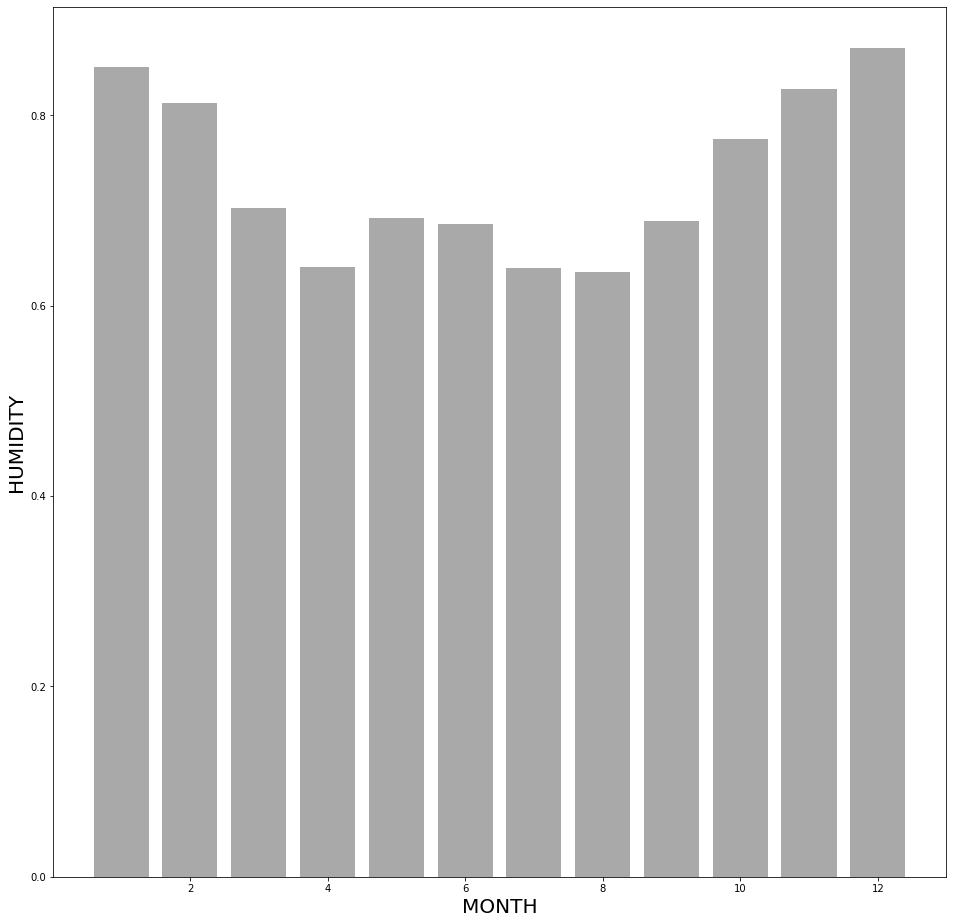

In [38]:
rcParams['figure.figsize'] = 16,16
x = merge_1['Month']
y = merge_1['Humidity']
plt.xlabel('MONTH',fontsize=20)
plt.ylabel('HUMIDITY',fontsize=20)
plt.bar(x,y,color='darkgray')
plt.show()

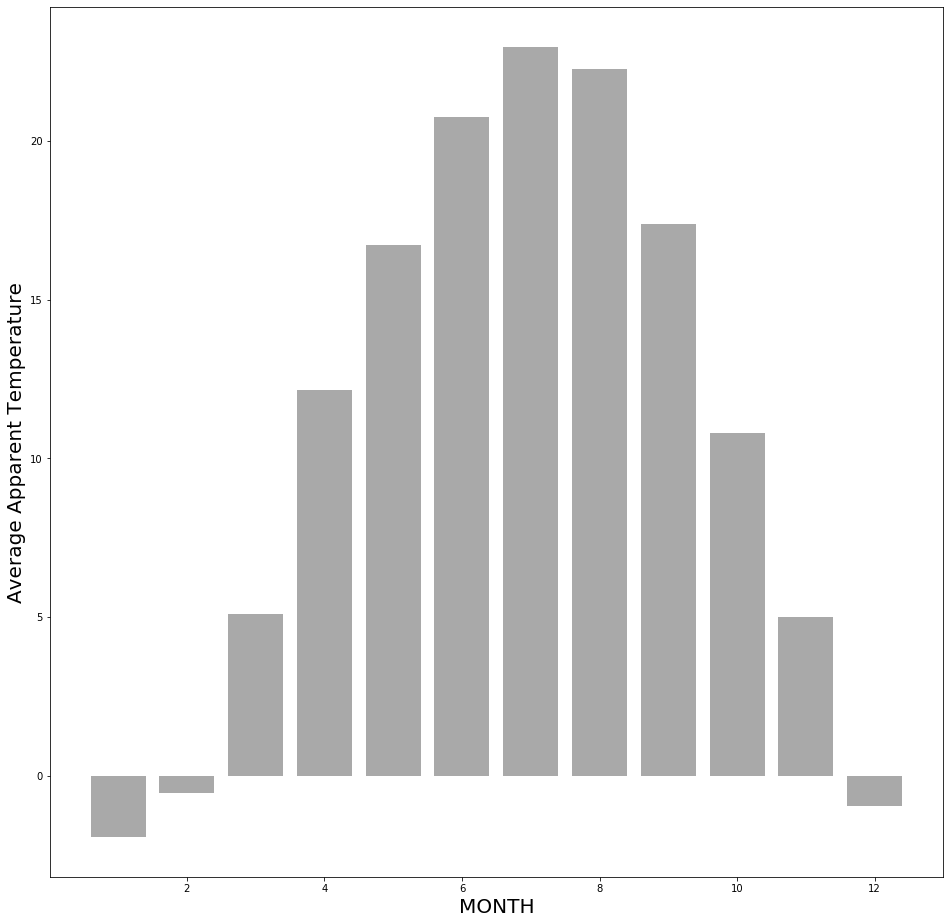

In [39]:
rcParams['figure.figsize'] = 16,16
x = merge_1['Month']
y = merge_1['Average Apparent Temperature']
plt.xlabel('MONTH',fontsize=20)
plt.ylabel('Average Apparent Temperature',fontsize=20)
plt.bar(x,y,color='darkgray')
plt.show()

In [40]:
def facet_heatmap(data, color, **kws):
    values=data.columns.values[3]
    data = data.pivot(index='Day', columns='Hour', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)

In [41]:
def weather_calendar(year,weather): 
    dfyear = df[df['Year']==year][['Month', 'Day', 'Hour', weather]]
    vmin=dfyear[weather].min()
    vmax=dfyear[weather].max()
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(dfyear,col="Month", col_wrap=3) 
        g = g.map_dataframe(facet_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Hour', 'Day')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('%s Calendar. Year: %s.' %(weather, year), fontsize=18)

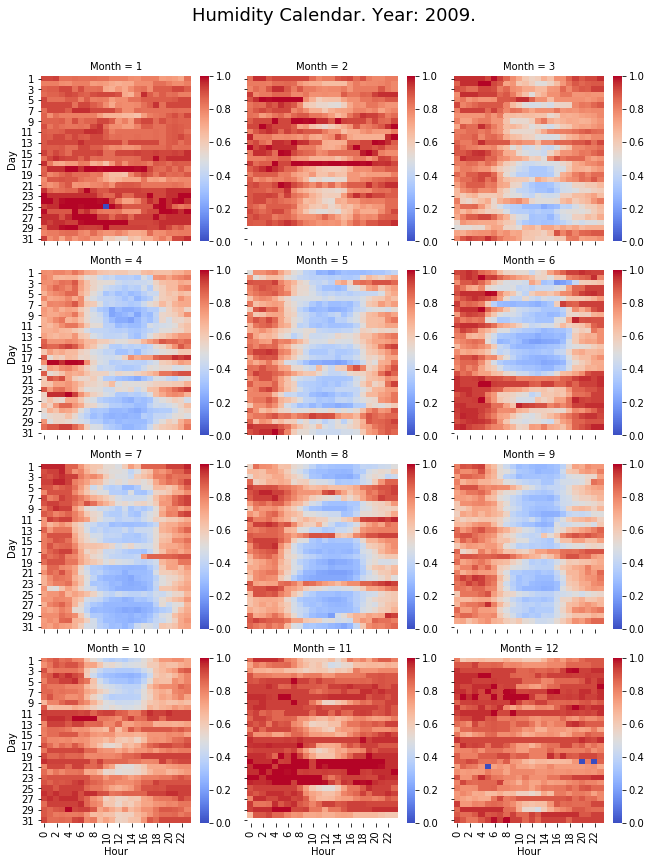

In [42]:
weather_calendar(2009,'Humidity')